In [0]:
dbutils.fs.ls("/FileStore/")

[FileInfo(path='dbfs:/FileStore/tables/', name='tables/', size=0, modificationTime=0)]

In [0]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/BDTT_Lab_2023_24_Week7__1_.pdf', name='BDTT_Lab_2023_24_Week7__1_.pdf', size=1179007, modificationTime=1714128978000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1709137348000),
 FileInfo(path='dbfs:/FileStore/tables/TS021_2021_2.csv', name='TS021_2021_2.csv', size=497239, modificationTime=1710953978000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706717421000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2021.csv', name='clinicaltrial_2021.csv', size=50359696, modificatio

In [0]:
fileroot = "clinicaltrial_2023"
import os
os.environ ['fileroot'] = fileroot

In [0]:
%sh
rm -r /tmp/$fileroot
rm /tmp/$fileroot.zip
rm /tmp/$fileroot.csv


rm: cannot remove '/tmp/clinicaltrial_2023': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2023.zip': No such file or directory
rm: cannot remove '/tmp/clinicaltrial_2023.csv': No such file or directory


In [0]:
dbutils.fs.rm("/FileStore/tables/" + fileroot+".csv" , True)

True

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")


True

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip


Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  


In [0]:
%sh
ls /tmp

Rserv
Rtmp4ZUpBd
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.csv
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
python_lsp_logs
systemd-private-b0e79839b4114dd29266df262d4f0869-systemd-logind.service-yahHX5
systemd-private-b0e79839b4114dd29266df262d4f0869-systemd-resolved.service-mTX5zJ
tmp.Mi3G2uvK8y


In [0]:

dbutils.fs.mv("file:/tmp/" + fileroot+".csv" , "/FileStore/tables/", True )

True

In [0]:
dbutils.fs.head("/FileStore/tables/clinicaltrial_2023.csv")

[Truncated to first 65536 bytes]


'"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
#creating an rdd from the csv
myrdd= sc.textFile("/FileStore/tables/clinicaltrial_2023.csv")

myrdd.take(5)

['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
# basic data cleaning
# removing the header file as it is a csv file

header1 = myrdd.first()

myrdd1 = myrdd.filter(lambda row: row != header1).map(lambda line: line.rstrip(',,')).map(lambda line: line.replace('"',''))

myrdd1.take(5)

["NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)\tBEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",
 "NCT05992571\tOral Ketone Monoester Supplementation and Resting-state Brain Connectivity\t\tRECRUITING\tCerebrovascular Function|Cognition\tOTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB\tMcMaster University\tAlzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton\t30.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: TRIPLE (PARTICIPANT, INVESTIGATOR, OUTCOMES_

In [0]:
# spliting the rdd by the delimiter
myrdd2 = myrdd1.map(lambda line: line.split('\t'))

myrdd2.take(5)

[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocat

In [0]:
#cheking the number of rows with legth not equal to 14
myrdd2.filter(lambda x: len(x) != 14).take(10)


[['NCT00146315',
  'ESCAP: Supervised Exercise for Patients With Coronary Heart Disease in the Primary Care Setting',
  '',
  'COMPLETED',
  'Coronary Heart Disease',
  'BEHAVIORAL: Supervised exercise on a stationary bicycle, 3-5 days a week|BEHAVIORAL: Secondary prevention program for coronary heart disease',
  'Basque Health Service',
  'Preventive Services and Health Promotion Research Network|Castilla-La Mancha Health Service|Castilla-León Health Service|Dalt Sant Joan primary care center (Balears Islans Health Service)|Public Health Service of C'],
 ['taluña|Public Health Service of Madrid|Public Health Service of Galicia|Cantabria Health Service',
  '97.0',
  'OTHER_GOV',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2005-01',
  '2010-06']]

In [0]:
# since there is ony two rows that are not 14 in length we could remove those rows as it won't affect the data evaluation.
myrdd3 = myrdd2.filter(lambda x: len(x) == 14)

myrdd3.take(5)

[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G., Depression, Psychosis, Personality Disorder, Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant, Haldimand Norfolk, Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocat

In [0]:
# total cont of the file
myrdd3.count()

483420

In [0]:
#Q1

StudytitleRdd = myrdd3.map(lambda line: line [1])

#takeing distinct count

distinct_data = StudytitleRdd.distinct()
distinct_count = distinct_data.count()
print("Distinct Study count:", distinct_count)

Distinct Study count: 481100


In [0]:
#Q2

StudyTypesRdd = myrdd3.map(lambda line:(line [-4], 1)).\
                reduceByKey(lambda a,b: a + b).\
                sortBy(lambda x: x[1], ascending=False)

StudyTypesRdd.take(5)

[('INTERVENTIONAL', 371382),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928),
 ('', 889)]

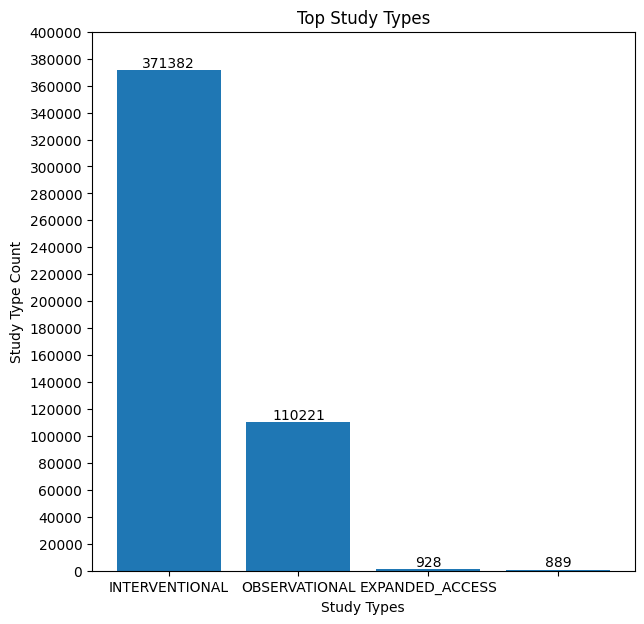

In [0]:
#ploying the result of  top Study types using matplotlib

import matplotlib.pyplot as plt
import numpy as np
data_collected = StudyTypesRdd.collect()
keys = [kv[0] for kv in data_collected]
values = [kv[1] for kv in data_collected]
plt.figure(figsize=(7,7))
plt.bar(keys , values)
for i in range(len(keys)):
    plt.text(keys[i], values[i], str(values[i]), ha='center', va='bottom')
plt.xlabel('Study Types')
plt.ylabel('Study Type Count')
plt.yticks(range(0, 400001, 20000))
plt.title('Top Study Types')
plt.show()

In [0]:
#Q3

Conditions = myrdd3.map(lambda line: (line [4] )).\
             map(lambda row: row.split("|")).\
             flatMap(lambda x:x).map(lambda word: (word,1)).\
             reduceByKey(lambda a,b: a + b).\
             sortBy(lambda x: x[1], ascending=False)

Conditions.take(5)

[('Healthy', 9731),
 ('Breast Cancer', 7502),
 ('Obesity', 6549),
 ('Stroke', 4072),
 ('Hypertension', 4020)]

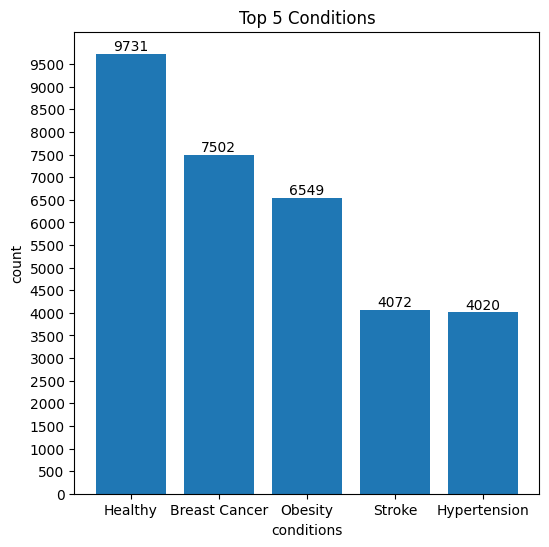

In [0]:
#ploting the result of top five conditions

import matplotlib.pyplot as plt
import numpy as np
data_collected = Conditions.take(5)
key = [kv[0] for kv in data_collected]
value = [kv[1] for kv in data_collected]
plt.figure(figsize=(6,6))
for i in range(len(key)):
    plt.text(key[i], value[i], str(value[i]), ha='center', va='bottom')
plt.bar(key , value)
plt.xlabel('conditions')
plt.ylabel('count')
plt.yticks(range(0, 10000, 500))
plt.title('Top 5 Conditions')
plt.show()

In [0]:
# next we need to import the pharma file 

fileroot = "pharma"
import os
os.environ ['fileroot'] = fileroot

In [0]:
%sh
rm -r /tmp/$fileroot
rm /tmp/$fileroot.zip
rm /tmp/$fileroot.csv

rm: cannot remove '/tmp/pharma': No such file or directory
rm: cannot remove '/tmp/pharma.zip': No such file or directory
rm: cannot remove '/tmp/pharma.csv': No such file or directory


In [0]:
dbutils.fs.rm("/FileStore/tables/" + fileroot+".csv" , True)

True

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")

True

In [0]:
%sh
unzip -d /tmp /tmp/$fileroot.zip

Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot+".csv" , "/FileStore/tables/", True )

True

In [0]:
dbutils.fs.head("/FileStore/tables/pharma.csv")

[Truncated to first 65536 bytes]


'"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s car

In [0]:
#converting the pharma into rdd
myrdd4= sc.textFile("/FileStore/tables/pharma.csv")

myrdd4.take(5)

['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s

In [0]:
#removing header from pharma csv 
header2 = myrdd4.first()
myrdd4 = myrdd4.filter(lambda row: row != header2)

In [0]:
ParentcompanyRDD= myrdd4.map(lambda line: line.split(",")[1]).\
                  map(lambda x: x.replace('"', ''))

ParentcompanyRDD.take(10)

['Abbott Laboratories',
 'AbbVie',
 'AbbVie',
 ' Inc.',
 'Johnson & Johnson',
 'Abbott Laboratories',
 ' Inc.',
 'Johnson & Johnson',
 ' a division of Ethicon Inc.',
 'Abbott Laboratories']

In [0]:
#selecting Sponser column from clinicaltrial

SponserRDD = myrdd3.map(lambda line: (line [6])).\
             map(lambda x: x.replace('"', ''))

SponserRDD.take(10)

['Sangath',
 'McMaster University',
 'Melbourne Health',
 'Assistance Publique - Hôpitaux de Paris',
 'Istituto Auxologico Italiano',
 'University of Oregon',
 'Medical University of South Carolina',
 'Johns Hopkins University',
 'University of Manitoba',
 'M.D. Anderson Cancer Center']

In [0]:
#Q4

NonpharmaCompanyRDD=SponserRDD.subtract(ParentcompanyRDD)

CountofNonpharmaRDD=NonpharmaCompanyRDD.map(lambda x: (x,1)).\
                     reduceByKey(lambda a,b: a+b).\
                     sortBy(lambda x: x[1],ascending=False)

                     
CountofNonpharmaRDD.take(10)


[('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

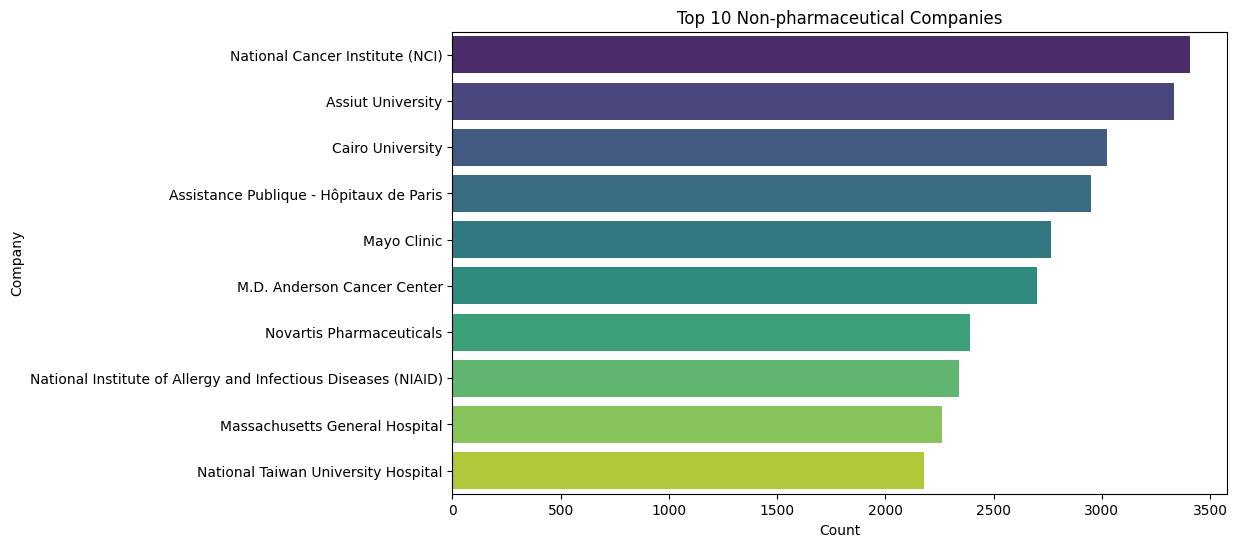

In [0]:
#ploting the result of Q4

import seaborn as sns
companies = [item[0] for item in CountofNonpharmaRDD.take(10)]
counts = [item[1] for item in CountofNonpharmaRDD.take(10)]
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=companies, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Company')
plt.title('Top 10 Non-pharmaceutical Companies')
plt.show()





In [0]:
#Q5

Completedin2023RDD= myrdd3.map(lambda parts: (parts[-1], parts[3])).\
                    filter(lambda x: x[0].startswith('2023') and x[1] == 'COMPLETED').\
                    map(lambda x:x[0]).\
                    map(lambda x:(x.split("-")[1],1)).\
                    reduceByKey(lambda x, y: x + y).\
                    sortBy(lambda x: x[0])


Completedin2023RDD.collect()

[('01', 1494),
 ('02', 1272),
 ('03', 1552),
 ('04', 1324),
 ('05', 1415),
 ('06', 1619),
 ('07', 1360),
 ('08', 1230),
 ('09', 1152),
 ('10', 1058),
 ('11', 909),
 ('12', 1082)]

In [0]:
#just giveing mont names insted of the month number
month_names = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

Completedin2023RDD = Completedin2023RDD.map(lambda x: (month_names[x[0]], x[1]))
Completedin2023RDD.collect()

[('January', 1494),
 ('February', 1272),
 ('March', 1552),
 ('April', 1324),
 ('May', 1415),
 ('June', 1619),
 ('July', 1360),
 ('August', 1230),
 ('September', 1152),
 ('October', 1058),
 ('November', 909),
 ('December', 1082)]

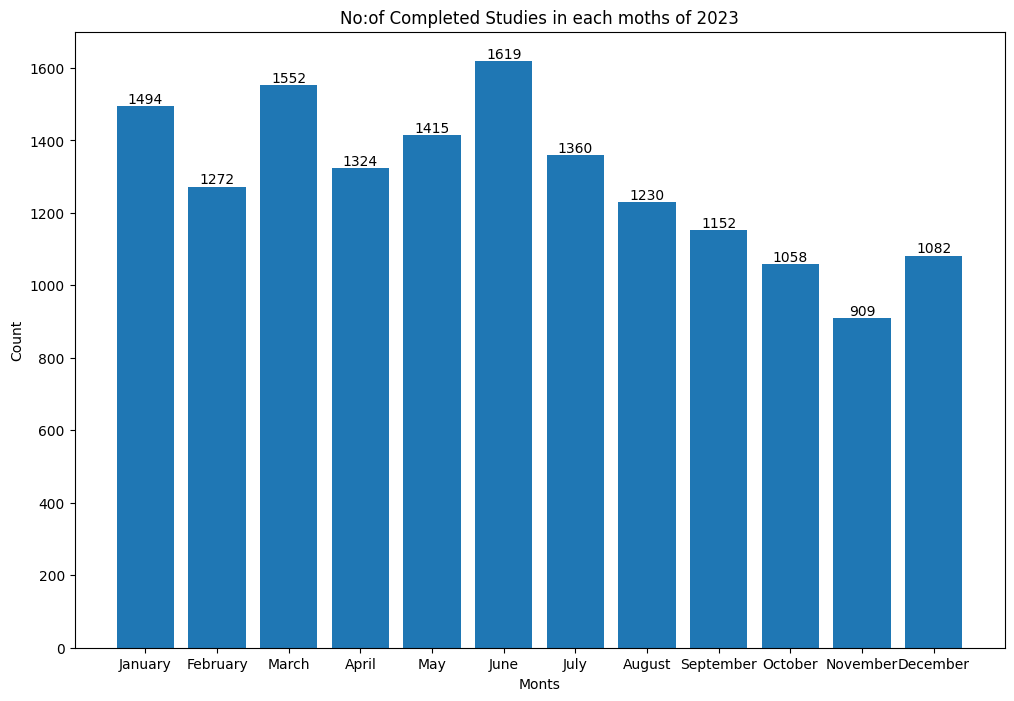

In [0]:
# ploting the Q5

import matplotlib.pyplot as plt
import numpy as np
data = Completedin2023RDD.collect()
key = [kv[0] for kv in data]
value = [kv[1] for kv in data]
plt.figure(figsize=(12,8))
for i in range(len(key)):
    plt.text(key[i], value[i], str(value[i]), ha='center', va='bottom')
plt.bar(key , value)
plt.xlabel('Monts')
plt.ylabel('Count')

plt.title('No:of Completed Studies in each moths of 2023')
plt.show()

In [0]:
#further analysis, analysing the study status column.
status_counts_rdd = myrdd3.map(lambda line: line [3]).countByValue().items()
print("Distribution of Study Status (RDD):", status_counts_rdd)

Distribution of Study Status (RDD): dict_items([('COMPLETED', 263497), ('RECRUITING', 66158), ('TERMINATED', 28022), ('NOT_YET_RECRUITING', 20098), ('ACTIVE_NOT_RECRUITING', 19716), ('UNKNOWN', 64813), ('WITHDRAWN', 13718), ('SUSPENDED', 1644), ('ENROLLING_BY_INVITATION', 3937), ('WITHHELD', 889), ('NO_LONGER_AVAILABLE', 446), ('AVAILABLE', 259), ('APPROVED_FOR_MARKETING', 197), ('TEMPORARILY_NOT_AVAILABLE', 26)])
